# Bias-Variance Exploration (20 pts)

In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_load = np.load('./data.npy', allow_pickle = True)

In [4]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test = data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [5]:
df_train = pd.DataFrame(np.concatenate((np.reshape(x_train, (-1, 1)), np.reshape(y_train, (-1, 1))), axis = 1)).rename(columns={0:'x_train', 1:'y_train'})
df_train = df_train.sort_values(by='x_train')

df_test = pd.DataFrame(np.concatenate((np.reshape(x_test, (-1, 1)), np.reshape(y_test, (-1, 1))), axis = 1)).rename(columns={0:'x_test', 1:'y_test'})
df_test = df_test.sort_values(by='x_test')

x_train = np.reshape(np.array(df_train[['x_train']]), (100,))
y_train = np.reshape(np.array(df_train[['y_train']]), (100,))
x_test = np.reshape(np.array(df_test[['x_test']]), (30,))
y_test = np.reshape(np.array(df_test[['y_test']]), (30,))

In [6]:
from cProfile import label
from distutils.log import error

def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), 
  # the fitted models (predictions on x_all by different models vs x_all), 
  # and the predictions on the test set (predictions on x_test by different models vs x_test). 

  train_errors = {}
  test_errors = {}

  plt.scatter(x_train, y_train, label='Training data', color='dimgrey')
  plt.scatter(x_test, y_test, label='Test data', color='darkgrey')

  for deg in [2, 4, 7]:

    x_train_poly = np.vander(x_train, deg + 1)
    x_test_poly = np.vander(x_test, deg + 1)
    
    lm = LinearRegression()
    
    lm.fit(x_train_poly, y_train)
    
    y_pred_train = lm.predict(x_train_poly)
    y_pred_test = lm.predict(x_test_poly)
    y_pred_all = lm.predict(np.vander(np.squeeze(x_all), deg+1))

    error_train = mean_squared_error(y_pred_train, y_train)
    error_test = mean_squared_error(y_pred_test, y_test)

    print(
      f"""
        MSE_train for polynomial model with degree {deg} = {error_train} \n
        MSE_test for polynomial model with degree {deg} = {error_test}
      """
    )
    train_errors[deg] = error_train
    test_errors[deg] = error_test

    plt.plot(x_train, y_pred_train, label=f'Training set fit, degree {deg}')
    plt.plot(x_test, y_pred_test, label=f'Test set fit, degree {deg}')
    plt.plot(x_all, y_pred_all, label=f'x_all fit, degree {deg}')
    plt.legend(loc='best', fancybox=True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-50, 150)
    plt.xlim(-5, 5)
    plt.title('Polynomial Fits')

  plt.show()

  return train_errors.values(), test_errors.values()


        MSE_train for polynomial model with degree 2 = 247.29679797371526 

        MSE_test for polynomial model with degree 2 = 320.06408346977867
      

        MSE_train for polynomial model with degree 4 = 31.720018057290066 

        MSE_test for polynomial model with degree 4 = 31.29208288660671
      

        MSE_train for polynomial model with degree 7 = 30.67719359210973 

        MSE_test for polynomial model with degree 7 = 33.41069407769005
      


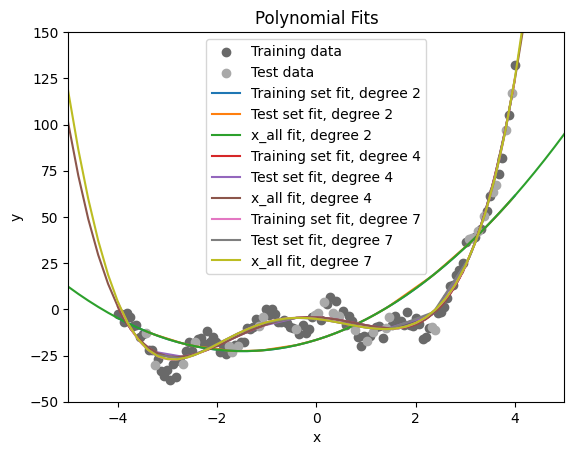

In [7]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

The polynomial with degree 4 gives the best overall performance, considering that the training error is comparable to the test error, whereas in the case of the 7th degree polynomial there is clear overfitting, since the MSE on the test set is higher than that on the training set. Higher order polynomials often produce a fit with high variance and low bias. However, this does not represent the true nature of the function and the generalization gap is negative. whereas lower order polynomials give a high bias and produce too much error (not enough variance). 

20% data

        MSE_train for polynomial model with degree 2 = 20.358724904085403 

        MSE_test for polynomial model with degree 2 = 5089.68757259721
      

        MSE_train for polynomial model with degree 4 = 3.952724286499643 

        MSE_test for polynomial model with degree 4 = 82966218.95827506
      

        MSE_train for polynomial model with degree 7 = 3.39391825450499 

        MSE_test for polynomial model with degree 7 = 1087304779877.6344
      


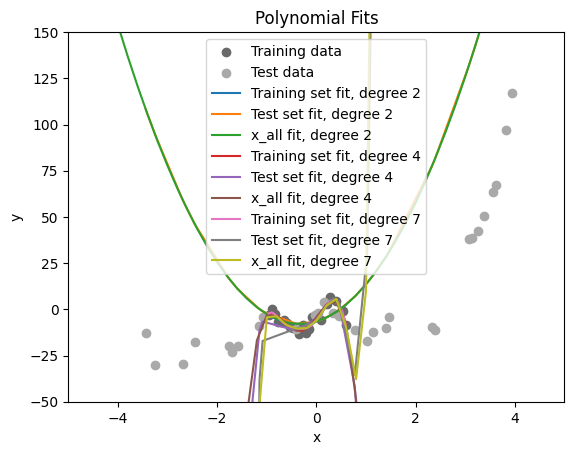

40% data

        MSE_train for polynomial model with degree 2 = 28.66960082094039 

        MSE_test for polynomial model with degree 2 = 4816.506429270662
      

        MSE_train for polynomial model with degree 4 = 27.580435109097976 

        MSE_test for polynomial model with degree 4 = 3750.924095536306
      

        MSE_train for polynomial model with degree 7 = 10.90513863428763 

        MSE_test for polynomial model with degree 7 = 422438839.2629125
      


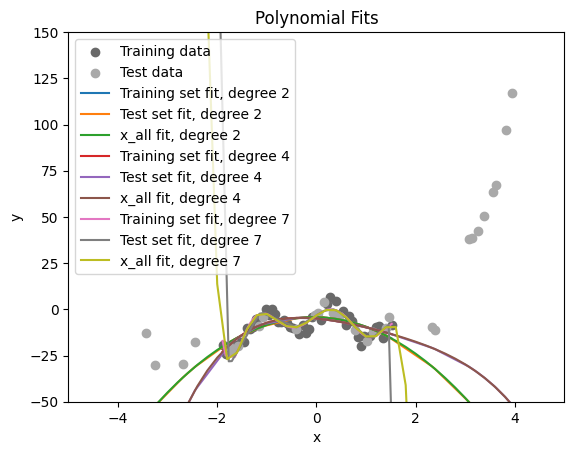

60% data

        MSE_train for polynomial model with degree 2 = 28.93651342548223 

        MSE_test for polynomial model with degree 2 = 2258.089238421438
      

        MSE_train for polynomial model with degree 4 = 26.26804374637472 

        MSE_test for polynomial model with degree 4 = 60.626726926794746
      

        MSE_train for polynomial model with degree 7 = 23.910514172711927 

        MSE_test for polynomial model with degree 7 = 838736.120809009
      


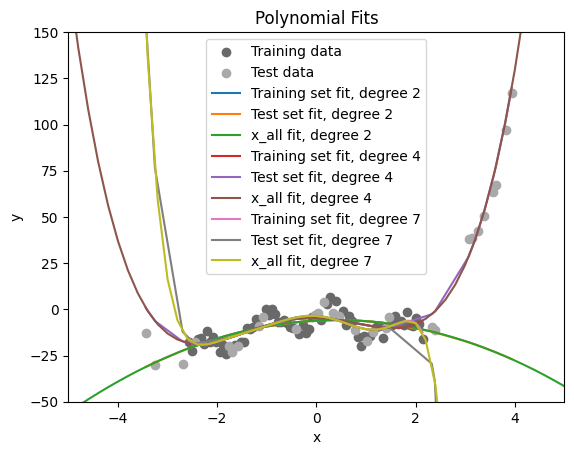

80% data

        MSE_train for polynomial model with degree 2 = 59.44555037287229 

        MSE_test for polynomial model with degree 2 = 1372.058630037611
      

        MSE_train for polynomial model with degree 4 = 28.72553282854792 

        MSE_test for polynomial model with degree 4 = 38.997440634313975
      

        MSE_train for polynomial model with degree 7 = 26.71402112036835 

        MSE_test for polynomial model with degree 7 = 471.91682699640734
      


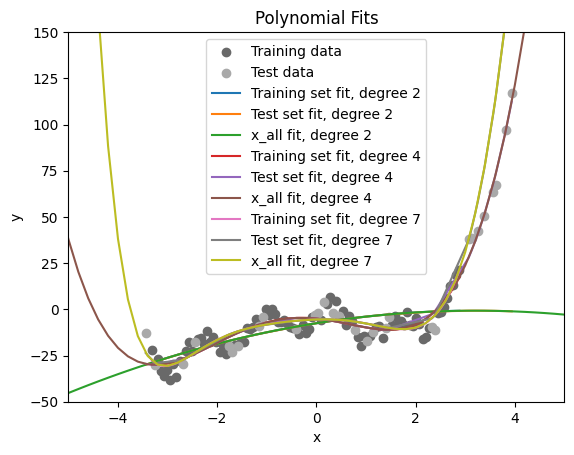

100% data

        MSE_train for polynomial model with degree 2 = 247.29679797371526 

        MSE_test for polynomial model with degree 2 = 320.06408346977867
      

        MSE_train for polynomial model with degree 4 = 31.720018057290066 

        MSE_test for polynomial model with degree 4 = 31.29208288660671
      

        MSE_train for polynomial model with degree 7 = 30.67719359210973 

        MSE_test for polynomial model with degree 7 = 33.41069407769005
      


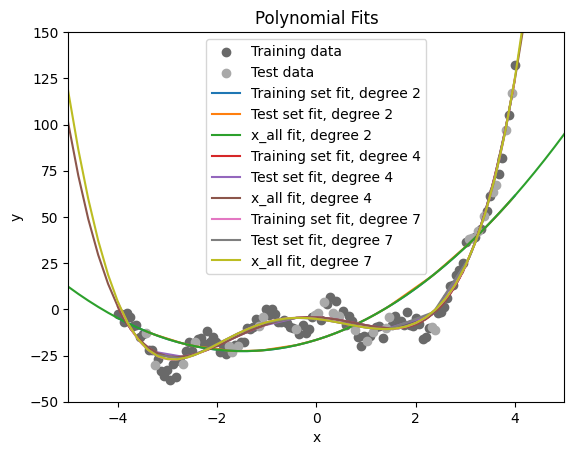

In [8]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [9]:
print(test_rmses_100)

dict_values([320.06408346977867, 31.29208288660671, 33.41069407769005])


In [10]:
# Plotting the log(MSE for x_train and x_test vs training and test data size respectively)
plot_df = pd.DataFrame({
    (train_rmses_20, test_rmses_20, 20), 
    (train_rmses_40, test_rmses_40, 40), 
    (train_rmses_60, test_rmses_60, 60), 
    (train_rmses_80, test_rmses_80, 80), 
    (train_rmses_100, test_rmses_100, 100)
})
plot_df.head()

plot_df['deg_2_train'] = plot_df[0].map(lambda x: list(x)[0])
plot_df['deg_4_train'] = plot_df[0].map(lambda x: list(x)[1])
plot_df['deg_7_train'] = plot_df[0].map(lambda x: list(x)[2])
plot_df['deg_2_test'] = plot_df[1].map(lambda x: list(x)[0])
plot_df['deg_4_test'] = plot_df[1].map(lambda x: list(x)[1])
plot_df['deg_7_test'] = plot_df[1].map(lambda x: list(x)[2])
plot_df = plot_df.drop(columns = [0, 1]).rename(columns={2: 'Dataset size'})

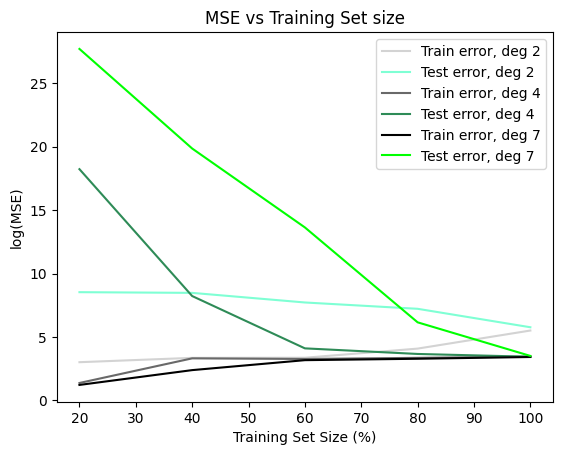

In [11]:
plot_df = plot_df.sort_values(by='Dataset size')
for i in [1, 2, 3]:
    plt.plot(plot_df.T.iloc[0], np.log(plot_df.T.iloc[i]), label=f'Train error, deg {[2, 4, 7][i-1]}', color=['lightgray', 'dimgray', 'black'][i-1])
    plt.plot(plot_df.T.iloc[0], np.log(plot_df.T.iloc[i+3]),label= f'Test error, deg {[2, 4, 7][i-1]}', color=['aquamarine', 'seagreen', 'lime'][i-1])
    plt.xlabel('Training Set Size (%)')
    plt.ylabel('log(MSE)')
    plt.title('MSE vs Training Set size')
    plt.legend(loc='best')
plt.show()

## Stochastic Gradient Descent

In [12]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                error = (y[i] - np.dot(self.coef, X[i, :]))**2

                # Compute gradients
                gradient = -(y[i] - np.dot(self.coef, X[i, :]))*X[i, :] - self.regularization*self.coef
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return np.dot(X, self.coef)        

In [13]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [14]:
# Getting all the MSE, coef values, alpha and regularization values in a DataFrame and selecting the best one (the one that gives us the lowest MSE)
count = 0
coefs_df = pd.DataFrame()
for alpha in learning_rate:
    for reg in regularization:
        regression = Regression(alpha, reg, n_epochs)
        regression.fit(X, y)
        coefs_df[count] = pd.Series([alpha, reg, regression.coef, regression.lowest_mse])
        count+=1

In [15]:
coefs_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0001,0.0001,0.0001,0.001,0.001,0.001,0.01,0.01,0.01,0.1,...,0.1,1,1,1,10,10,10,100,100,100
1,0,10,100,0,10,100,0,10,100,0,...,100,0,10,100,0,10,100,0,10,100
2,"[0.0727278500411682, 0.04519622355008878, 0.03...","[10.251918063271612, 6.39427524102828, 5.31584...","[1.2543498862354752e+29, 8.031895445625255e+28...","[0.12781908297419203, 0.06548156092136485, 0.0...","[8.8826180820651e+28, -2.969262695457045e+28, ...","[nan, nan, nan, nan]","[0.16215428240809382, -0.0021288033726891502, ...","[-6.8425423666625845e+305, 4.448662641967557e+...","[nan, nan, nan, nan]","[0.17788453963105805, 0.04687676158087459, 0.2...",...,"[nan, nan, nan, nan]","[-1.1291922052554626e+194, -9.94388518776874e+...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
3,0.036821,284.795513,3914117296910813732338126285509784637421694772...,0.030496,1106388083294084577762368899578602843307894102...,NaN,0.027391,inf,NaN,0.030988,...,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
best_coefs = coefs_df[coefs_df.iloc[3].map(lambda x: float(x)).idxmin()]
coefs_df = coefs_df.drop(columns=coefs_df.iloc[3].map(lambda x: float(x)).idxmin())
second_best_coefs = coefs_df[coefs_df.iloc[3].map(lambda x: float(x)).idxmin()]
print(f"""
    Best learning rate is {best_coefs.iloc[0]} \n
    Best regularization parameter is {best_coefs.iloc[1]} \n
    Best coefficients: w0 = {best_coefs.iloc[2][0]}, w1 = {best_coefs.iloc[2][1]}, w2 = {best_coefs.iloc[2][2]}, w3 = {best_coefs.iloc[2][3]} \n
    Lowest MSE = {best_coefs.iloc[3]}
""")

print(f"""
    Second best learning rate is {second_best_coefs.iloc[0]} \n
    Second best regularization parameter is {second_best_coefs.iloc[1]} \n
    Second best coefficients: w0 = {second_best_coefs.iloc[2][0]}, w1 = {second_best_coefs.iloc[2][1]}, w2 = {second_best_coefs.iloc[2][2]}, w3 = {second_best_coefs.iloc[2][3]} \n
    Lowest MSE = {second_best_coefs.iloc[3]}
""")


    Best learning rate is 0.01 

    Best regularization parameter is 0 

    Best coefficients: w0 = 0.16215428240809382, w1 = -0.0021288033726891502, w2 = 0.2633218280397205, w3 = -0.2314981683906145 

    Lowest MSE = 0.027391087575201013


    Second best learning rate is 0.001 

    Second best regularization parameter is 0 

    Second best coefficients: w0 = 0.12781908297419203, w1 = 0.06548156092136485, w2 = 0.09039040907660739, w3 = -0.08129150910272444 

    Lowest MSE = 0.030495991520073523



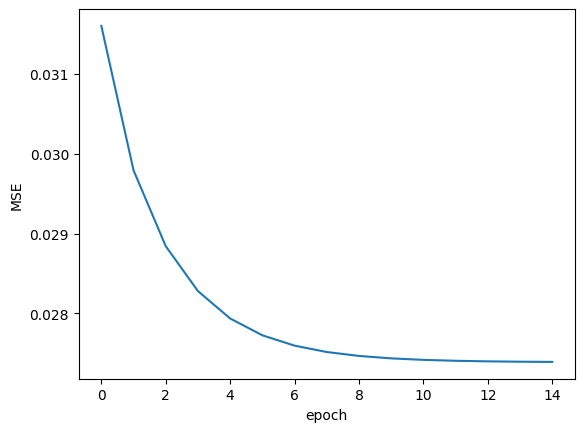

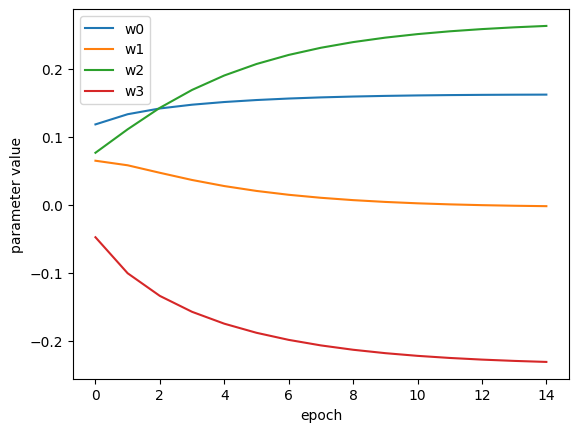

In [17]:
# Plotting the MSE vs epochs for the best combination of alpha and regularization coefficient
regression = Regression(learning_rate=best_coefs.iloc[0], regularization=best_coefs.iloc[1], n_epoch=n_epochs)
regression.fit(X, y, plot=True)